In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
np.set_printoptions(precision=6) #Mostrar numeros con maximo seis digitos de precision
np.set_printoptions(suppress=True) # Suprimir uso de notacion cientifica para numeros muy pequenos

In [316]:
N = 23 # Numero de periodos
mYah = 0 # Numero de acciones extraidas de Yahoo
mFin = 6 # Numero de acciones extraidas de Finance.com
m = mYah + mFin # Numero de acciones

precios = np.zeros((m, N+1))
retornos = np.zeros((m, N))

Extrayendo columnas de los archivos de Yahoo Finance:

In [317]:
archivosYahoo = ['csvs/EC.csv','csvs/CIB.csv']

In [318]:
for k in range(mYah):
    archivo = archivosYahoo[k]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N+1):
        precios[k, i] = lector.__next__()[5] #Extraer la 5ta columna: precio de cierre ajustado
        if (i > 0):
            retornos[k, i-1] = (precios[k, i] - precios[k, i-1])/precios[k, i-1]

Extrayendo columnas de los archivos de Investing.com

In [319]:
 archivosFin = [ 'csvs/CFV-2.csv', 'csvs/FTSE-2.csv', 'csvs/IMI-2.csv', 'csvs/BIC_p1-2.csv', 'csvs/MAS-2.csv', 'csvs/PMG-2.csv']

In [320]:
for k in range(mYah, mYah + mFin):
    archivo = archivosFin[k - mYah]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N, -1, -1):
        precios[k, i] = lector.__next__()[1] #Extraer la 1era columna: precio de cierre
        if (i < N):
            retornos[k, i] = (precios[k, i+1] - precios[k, i])/precios[k, i]

In [321]:
np.shape(retornos)

(6, 23)

TODO: Explicar, a la luz de la lectura 1, la naturaleza de esos activos.

# 3

Vector de Rendimientos promedio

In [322]:
retProm = np.mean(retornos, 1, keepdims = True) # Hallar el promedio de la matriz de retornos a lo largo del eje temporal

print("Tamaño de matriz de rentabilidades:", np.shape(retProm)) # En efecto el vector retProm tiene tamaño 7x1, donde 7 es el número de activos
print("Retornos promedio:\n", retProm)

Tamaño de matriz de rentabilidades: (6, 1)
Retornos promedio:
 [[0.001484]
 [0.010866]
 [0.005016]
 [0.019599]
 [0.018384]
 [0.003606]]


Matriz de Covarianzas

In [323]:
S = np.zeros((m, m)) # Inicializacion en 0's

for k in range(m): # Iterar con k sobre activos
    for l in range(m): # Iterar con l sobre activos
        for i in range(N): # Iterar sobre el tiempo con i
            # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
            S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l]) 
            
print("Matriz de covarianzas:\n", S)

Matriz de covarianzas:
 [[ 0.195841  0.069729  0.070606  0.066326  0.016321 -0.037663]
 [ 0.069729  0.053816  0.042587  0.049801  0.0114   -0.005918]
 [ 0.070606  0.042587  0.083977  0.040482  0.027572 -0.010649]
 [ 0.066326  0.049801  0.040482  0.071042  0.008762 -0.019772]
 [ 0.016321  0.0114    0.027572  0.008762  0.139274 -0.01058 ]
 [-0.037663 -0.005918 -0.010649 -0.019772 -0.01058   0.17264 ]]


In [324]:
varianzas = np.array([S[i, i] for i in range(m)]).reshape((m, 1))
desvs = np.sqrt(varianzas)

print("\nVarianzas:\n", varianzas)


Varianzas:
 [[0.195841]
 [0.053816]
 [0.083977]
 [0.071042]
 [0.139274]
 [0.17264 ]]


## Matriz de Covarianzas es Definida Positiva

### Matriz Cuadrada

In [325]:
np.shape(S)

(6, 6)

### Simétrica

In [326]:
S - S.transpose() # Debería ser igual a su transpuesta,  y lo es pues su diferencia es 0

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Definida Positiva

Usamos la caracterización vista en clase: los subdeterminantes en línea son positivos. En particular vemos que el determinante de la matriz es distinto de $0$.

In [327]:
for k in range(1,m):
    submatPpal = S[:k, :k]
    detp = np.linalg.det(submatPpal)
    print("El determinante de la submatriz  de tamaño ", np.shape(submatPpal), " que contiene la entrada 1,1, es decir la matriz\n", submatPpal, " es ", detp, "!= 0\n")

El determinante de la submatriz  de tamaño  (1, 1)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841]]  es  0.19584112918255894 != 0

El determinante de la submatriz  de tamaño  (2, 2)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729]
 [0.069729 0.053816]]  es  0.005677203963545524 != 0

El determinante de la submatriz  de tamaño  (3, 3)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606]
 [0.069729 0.053816 0.042587]
 [0.070606 0.042587 0.083977]]  es  0.0002726227402310885 != 0

El determinante de la submatriz  de tamaño  (4, 4)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606 0.066326]
 [0.069729 0.053816 0.042587 0.049801]
 [0.070606 0.042587 0.083977 0.040482]
 [0.066326 0.049801 0.040482 0.071042]]  es  6.791507175274476e-06 != 0

El determinante de la submatriz  de tamaño  (5, 5)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606 0.066326 0.016321]
 [0.069729 0.0

In [328]:
Sinv = np.linalg.inv(S)
print(Sinv)

[[ 10.430682 -11.308413  -3.160588   0.428515   0.436429   1.768793]
 [-11.308413  77.940575 -11.792222 -38.667086  -0.666807  -4.992232]
 [ -3.160588 -11.792222  21.967337  -0.943654  -2.956     -0.027958]
 [  0.428515 -38.667086  -0.943654  42.208544   0.919857   3.600403]
 [  0.436429  -0.666807  -2.956      0.919857   7.74657    0.470119]
 [  1.768793  -4.992232  -0.027958   3.600403   0.470119   6.446605]]


In [329]:
S.dot(Sinv)

array([[ 1.,  0., -0.,  0.,  0., -0.],
       [-0.,  1., -0., -0.,  0., -0.],
       [-0., -0.,  1., -0., -0., -0.],
       [-0., -0.,  0.,  1., -0.,  0.],
       [-0., -0.,  0., -0.,  1.,  0.],
       [ 0., -0.,  0.,  0., -0.,  1.]])

# 4

Parámetros de la teoría

In [330]:
u = np.ones((m, 1))

A = u.transpose().dot(Sinv.dot(u))[0,0]
B = u.transpose().dot(Sinv.dot(retProm))[0,0]
C = retProm.transpose().dot(Sinv.dot(retProm))[0,0]
D = A*C - B**2

print("A =", A, "\t B =", B, "\t C =", C, ", entonces D =", D)

A = 32.958628128159624 	 B = 0.41113541046705426 	 C = 0.010439302986027235 , entonces D = 0.1750327792937448


# 5

Ecuación general de los portafolios óptimos dados los parámetros de la teoría $A, B, C$ y el parámetro $\mu$: $x*(\mu) = (\frac{C - B\mu}{D}) S^{-1} \hat u + (\frac{A \mu - B}{D})S^{-1}\bar r$, en nuestro caso, como:

In [331]:
def xOptMu(mu):
    return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)

rentDeseadas = np.linspace(0., 0.02, 9).reshape((9,1,1))

portOptMu = np.zeros( (len(rentDeseadas), m, 1) )

for i in range(len(rentDeseadas)):
    portOptMu[i] = xOptMu(rentDeseadas[i])
    
print(tabulate(np.concatenate((rentDeseadas,portOptMu), axis = 1), ["Mu"] +["% Activo "+str(i) for i in range(1, 8)]))

    Mu    % Activo 1    % Activo 2    % Activo 3    % Activo 4    % Activo 5    % Activo 6
------  ------------  ------------  ------------  ------------  ------------  ------------
0         0.15218         0.667353     0.40858      -0.566745      0.0243601      0.314272
0.0025    0.11314         0.597539     0.345466     -0.407274      0.0556594      0.295469
0.005     0.0741008       0.527725     0.282353     -0.247803      0.0869586      0.276666
0.0075    0.0350612       0.457911     0.219239     -0.0883313     0.118258       0.257863
0.01     -0.00397841      0.388097     0.156125      0.07114       0.149557       0.23906
0.0125   -0.043018        0.318282     0.0930112     0.230611      0.180856       0.220257
0.015    -0.0820576       0.248468     0.0298975     0.390083      0.212156       0.201454
0.0175   -0.121097        0.178654    -0.0332163     0.549554      0.243455       0.182651
0.02     -0.160137        0.10884     -0.09633       0.709025      0.274754       0.163847


En todos los portafolios hay posiciones en corto.

# 6

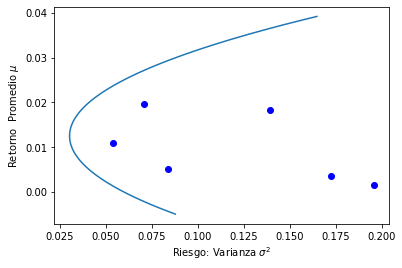

In [332]:
#varAx = np.linspace(0, 1.6*max([S[i, i] for i in range(m)]), 200)
mus = np.linspace(-0.005, 2*np.max(retProm), 200)
frontera = (A*mus**2 - 2*mus*B + C)/D

plt.xlabel("Riesgo: Varianza $\sigma^2$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.plot(frontera, mus)

plt.plot(varianzas, retProm, 'bo')